In [38]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [2]:
# 0-1. 무엇을 분석할 것인지 (주제) 정하기
# 0-2. 해당 주제에 맞게 X(독립변수)와 Y(종속변수) 정하고, 그에 맞는 데이터 수집

# 1. 데이터 파일 업로드
csv_file = '../datasets/2019_kbo_for_kaggle_v2.csv'
df = pd.read_csv(csv_file)

In [3]:
# 불러 온 데이터 확인

# 확인 방법 1. column 목록 확인
print(list(df.columns))  # list를 붙이면 더 깔끔하게 확인할 수 있다!!
# 확인 방법 2. 최초 5행 표시
df.head()   # 이상하게 얘를 1 위로 올리면 출력이 안된다;;;왜지

['batter_name', 'age', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'GB', 'SO', 'GDP', 'BU', 'fly', 'year', 'salary', 'war', 'year_born', 'hand2', 'cp', 'tp', '1B', 'FBP', 'avg', 'OBP', 'SLG', 'OPS', 'p_year', 'YAB', 'YOPS']


,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,tp,1B,FBP,avg,OBP,SLG,OPS,p_year,YAB,YOPS
0,백용환,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,...,포수,5.0,6.0,0.173,0.259,0.250,0.509,2014,79.0,0.580
1,백용환,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,...,포수,8.0,5.0,0.177,0.226,0.354,0.580,2015,154.0,0.784
2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,...,포수,20.0,20.0,0.234,0.316,0.468,0.784,2016,174.0,0.581
3,백용환,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,...,포수,23.0,20.0,0.195,0.276,0.305,0.581,2017,17.0,0.476
4,백용환,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,...,포수,3.0,3.0,0.176,0.300,0.176,0.476,2018,47.0,0.691


In [4]:
# 불러 온 데이터셋 중 필요한 column만 떼어내 numpy X, y에 저장

# 아래와 같이 하면 안됨!!! 단순히 값을 더하는 행위
# X = np.array(df['age']) + np.array(df['avg']) + np.array(df['OPS'])

# 그러면 어떻게 컬럼 일부만 추출하여 numpy로 저장하는가?
# 1. 우선 이렇게 dataframe에서 일부만 떼어 내어 새로운 dataframe을 만들어준다
df_slice = df[['age', 'avg', 'OPS', 'war']]
# 1-1. 그 다음 비어있는 행을 제거하기 위해 아래와 같은 코드 써 줌
df_slice = df_slice.replace('', np.nan)    # 빈 행을 nan값으로 채워준다
                                                  # inplace=True : 원본을 바꿈
# 1-2. null 값이 포함된 행 삭제
df_slice = df_slice.dropna()

#2. 그 다음 다음 함수들을 이용해 numpy로 바꿔준다
#X = ~.values
X = df_slice[['age', 'avg', 'OPS']].to_numpy()
print(X)
print(X.shape)

y = df_slice['war'].to_numpy()
print(y)
print(y.shape)
df_slice.head()

[[24.     0.173  0.509]
 [25.     0.177  0.58 ]
 [26.     0.234  0.784]
 ...
 [29.     0.077  0.154]
 [27.     0.312  0.849]
 [28.     0.308  0.889]]
(1899, 3)
[-0.055 -0.441  0.783 ... -0.271  2.365  5.356]
(1899,)


,age,avg,OPS,war
0,24.0,0.173,0.509,-0.055
1,25.0,0.177,0.580,-0.441
2,26.0,0.234,0.784,0.783
3,27.0,0.195,0.581,-0.405
4,28.0,0.176,0.476,-0.130


In [5]:
# statsmodels 라이브러리의 함수를 이용해 다중 선형 회귀 수행
X_const = sm.add_constant(X)   # 행렬 왼쪽 끝에 1 추가
print(X_const)

[[ 1.    24.     0.173  0.509]
 [ 1.    25.     0.177  0.58 ]
 [ 1.    26.     0.234  0.784]
 ...
 [ 1.    29.     0.077  0.154]
 [ 1.    27.     0.312  0.849]
 [ 1.    28.     0.308  0.889]]


In [6]:
# 다중선형회귀 수행
model = sm.OLS(y, X_const)
result = model.fit()
print(result.summary())

# 이 때 'exog contains inf or nans' 에러가 발생했었는데, 데이터 값 중 비어있는게 있어서 그렇다고 함
# 그래서 위의 셀에 결측값을 제거하는 코드를 추가하였음

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     322.8
Date:                Thu, 10 Jun 2021   Prob (F-statistic):          2.83e-169
Time:                        23:19:02   Log-Likelihood:                -3465.1
No. Observations:                1899   AIC:                             6938.
Df Residuals:                    1895   BIC:                             6960.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8927      0.215     -8.799      0.0

In [50]:
# 다음과 같은 식으로 추정한 파라미터(coefficient)를 불러올 수 있음
coef = result.params
print(f"Y-Intercept : {coef[0]}, slope = {coef[1:]}")

# MSE (Mean Squared Error) 계산
# mse = result.mse_model
# print(f"mse : {mse}")
y_pred = np.matmul(X_const, coef)   # 예측값 행렬 만들기 --> 이거 안하고 그냥 predict 써도 됨
print(f'MSE : {mean_squared_error(y, y_pred):.3f}')

Y-Intercept : -1.8927452110776823, slope = [ 0.01592982 -7.1742449   6.68555166]
MSE : 2.251


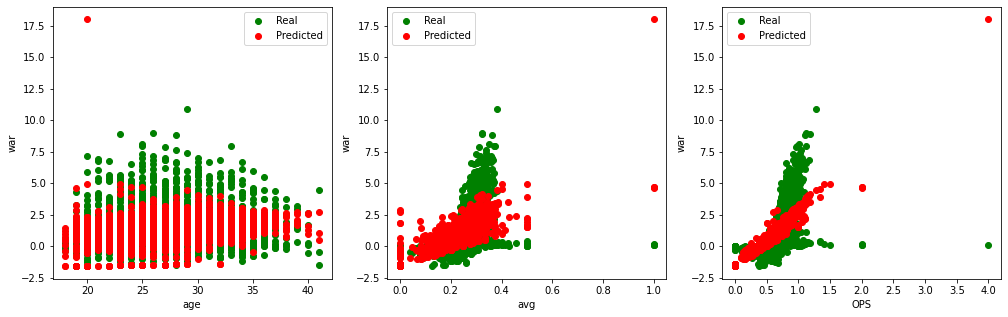

In [8]:
# 각 독립변수별 그래프 출력하기
import matplotlib.pyplot as plt
# %matplotlib inline

fig = plt.figure(figsize=[17,5])
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# ax1 : 나이 - war 관계
X_age = df_slice['age'].to_numpy()
ax1.scatter(X_age, y, c='green', label='Real')
ax1.scatter(X_age, y_pred, color='red', label='Predicted')
ax1.legend(loc = 'upper right')
ax1.set_xlabel('age')
ax1.set_ylabel('war')

# ax2 : 타율 - war 관계
X_avg = df_slice['avg'].to_numpy()
ax2.scatter(X_avg, y, c='green', label='Real')
ax2.scatter(X_avg, y_pred, color='red', label='Predicted')
ax2.legend(loc = 'upper left')
ax2.set_xlabel('avg')
ax2.set_ylabel('war')

# ax3 : OPS - war 관계
X_ops = df_slice['OPS'].to_numpy()
ax3.scatter(X_ops, y, c='green', label='Real')
ax3.scatter(X_ops, y_pred, color='red', label='Predicted')
ax3.legend(loc = 'upper left')
ax3.set_xlabel('OPS')
ax3.set_ylabel('war')

plt.show()

In [9]:
# 아웃라이어를 없애기 위해, 규정 타석을 채운 데이터만으로 다시 선형 회귀 수행

# 규정타석(PA)을 못 채운(446 미만) 데이터는 드랍
df_modify = df[df.PA >= 446.0]
print(len(df_modify))

# 이번에는 numpy를 만들지 않고 from_formula 함수를 이용하여 다중 선형 회귀 수행
# 전처리 : 비어있는 값
df_modify = df_modify.replace('', np.nan)
df_modify = df_modify.dropna()
print(len(df_modify))

468
468


In [10]:

# formula = "종속변수 ~ 독립변수1 + 독립변수2 + ..." 이 때 종속변수 행렬의 첫 열에 1은 안 붙여줘도(add_constant) 됨
model2 = sm.OLS.from_formula("war ~ age + avg + OPS", data=df_modify)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                    war   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     307.4
Date:                Thu, 10 Jun 2021   Prob (F-statistic):          7.39e-110
Time:                        23:19:06   Log-Likelihood:                -661.21
No. Observations:                 468   AIC:                             1330.
Df Residuals:                     464   BIC:                             1347.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.4133      0.533    -10.149      0.0

In [11]:
# 앞선 결과에서 [2] 조건수가 너무 크다. 다중공전성이나, 다른 수치적 문제가 있을 수 있다. 라는 진단이 내려짐
# ops자체가 avg와 큰 연관이 있어 다중공전성(독립변수간에 강한 상관관계)이 의심되나,
# 일단 age와 나머지 독립변수 간에 값의 범위가 상이하므로 scale 조정 문제일 수 있어 이 부분을 먼저 시도해보기로 한다.

# formula에 scale()을 써주면 statsmodel에서 scale을 해준다.
model3 = sm.OLS.from_formula("war ~ scale(age) + scale(avg) + scale(OPS)", data=df_modify)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                    war   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     307.4
Date:                Thu, 10 Jun 2021   Prob (F-statistic):          7.39e-110
Time:                        23:19:06   Log-Likelihood:                -661.21
No. Observations:                 468   AIC:                             1330.
Df Residuals:                     464   BIC:                             1347.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7138      0.046     80.486      0.0

In [40]:
# 파라미터 행렬 만들기
coef2 = result3.params.to_numpy()
print(coef2)

# MSE (Mean Squared Error) 계산
# mse2 = result3.mse_model
# print(f"mse : {mse2}")
y_pred2 = result3.predict(df_modify)
y2 = df_modify['war'].to_numpy()
print(f'MSE : {mean_squared_error(y2, y_pred2):.3f}')

[ 3.71377137 -0.47229941  0.28223153  1.17293151]
MSE : 0.988


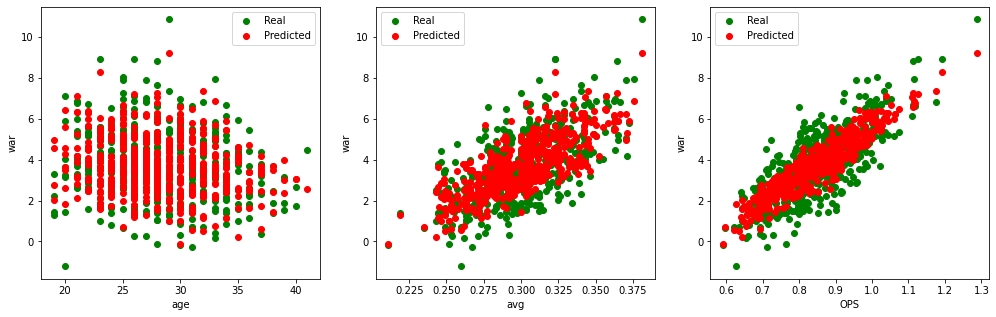

In [13]:
# 각 독립변수별 그래프 출력하기
import matplotlib.pyplot as plt
# %matplotlib inline

fig2 = plt.figure(figsize=[17,5])
ax1_2 = fig2.add_subplot(131)
ax2_2 = fig2.add_subplot(132)
ax3_2 = fig2.add_subplot(133)

# ax1 : 나이 - war 관계
X_age2 = df_modify['age'].to_numpy()
ax1_2.scatter(X_age2, y2, c='green', label='Real')
ax1_2.scatter(X_age2, y_pred2, color='red', label='Predicted')
ax1_2.legend(loc = 'upper right')
ax1_2.set_xlabel('age')
ax1_2.set_ylabel('war')

# ax2 : 타율 - war 관계
X_avg2 = df_modify['avg'].to_numpy()
ax2_2.scatter(X_avg2, y2, c='green', label='Real')
ax2_2.scatter(X_avg2, y_pred2, color='red', label='Predicted')
ax2_2.legend(loc = 'upper left')
ax2_2.set_xlabel('avg')
ax2_2.set_ylabel('war')

# ax3 : OPS - war 관계
X_ops2 = df_modify['OPS'].to_numpy()
ax3_2.scatter(X_ops2, y2, c='green', label='Real')
ax3_2.scatter(X_ops2, y_pred2, color='red', label='Predicted')
ax3_2.legend(loc = 'upper left')
ax3_2.set_xlabel('OPS')
ax3_2.set_ylabel('war')

plt.show()

In [60]:
# Train data, test data 구분해서 training과 testing 수행

# 데이터 분리
from sklearn.model_selection import train_test_split
df_mod_train, df_mod_test = train_test_split(df_modify, test_size=0.25, random_state=42)

# train data로 모델 생성
model4 = sm.OLS.from_formula("war ~ scale(age) + scale(avg) + scale(OPS)", data=df_mod_train)
result4 = model4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:                    war   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     211.3
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           6.09e-78
Time:                        02:15:12   Log-Likelihood:                -496.82
No. Observations:                 351   AIC:                             1002.
Df Residuals:                     347   BIC:                             1017.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7106      0.053     69.362      0.0

In [69]:
# test data로 테스팅 후 정확도 확인
y_train_pred = result4.predict(df_mod_train)
y_test_pred = result4.predict(df_mod_test)
y_train = df_mod_train['war'].to_numpy()
y_test = df_mod_test['war'].to_numpy()

# mse
print(f'MSE\ntrain : {mean_squared_error(y_train, y_train_pred):.3f}, test : {mean_squared_error(y_test, y_test_pred):.3f}')

# adjusted R^2 --> train data는 statsmodels에서 알아서 구해줬으므로 test만 구하면 된다.
# statsmodel에서 제공하는 적당한 라이브러리가 안 보이므로 직접 구하도록 하자.
def adj_r_squared(y, y_pred):
    n = len(y)    # 전체 test data 개수(n)
    y_mean =  np.full(n, np.mean(y))    # y의 평균으로 채워진 vector 생성
    denomicator = np.dot((y - y_mean), (y - y_mean))
    denomicator = denomicator / (n - 1)    # 자유도로 나눠준다
    numerator = np.dot((y - y_pred), (y - y_pred))
    numerator = numerator / (n - 4)
    adj_R_squared = 1 - numerator / denomicator
    return adj_R_squared
print(f'R^2\ntrain : {result4.rsquared_adj:.3f}, test : {adj_r_squared(y_test, y_test_pred):.3f}')

MSE
train : 0.993, test : 0.992
R^2
train : 0.643, test : 0.699
